#### 基本描述

本程序主要是基于goole提供的Inception-v3，并利用goole提供的“retrain.py”修改训练自己的模型。  
具体流程是：先执行retrain.bat文件得到重定义的模型，然后再用ipynb来测试。（具体细节见文末附录）

#### 导入包

In [1]:
import tensorflow as tf
import numpy as np
import re, os
from PIL import Image
import matplotlib.pyplot as plt

#### 测试模型

#####  预处理

In [4]:
# 把标签文件夹里的标签依次对应放入字典中
lines = tf.gfile.GFile('output_labels.txt').readlines()
uid_to_hum = {}
for uid, line in enumerate(lines):
    line = line.strip('\n')
    uid_to_hum[uid] = line
    
def id_to_string(node_id):
    if node_id not in uid_to_hum:
        return ''
    return uid_to_hum[node_id]

#####  创建一个图存放训练好的模型

In [3]:
with tf.gfile.GFile('output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')

##### 测试模型

images/停机坪.jpg


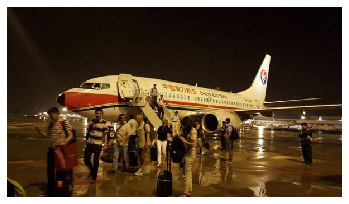

1.停机坪 (score = 0.89721)
2.机舱 (score = 0.02397)
0.航站楼 (score = 0.01443)
3.游乐场 (score = 0.01271)
5.舞台 (score = 0.01058)
6.艺术室 (score = 0.00983)
7.流水线 (score = 0.00983)
4.冰场 (score = 0.00869)
9.橄榄球场 (score = 0.00760)
8.棒球场 (score = 0.00516)

images/冰场.jpg


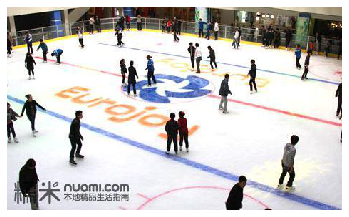

4.冰场 (score = 0.80546)
0.航站楼 (score = 0.04178)
3.游乐场 (score = 0.02843)
1.停机坪 (score = 0.02477)
8.棒球场 (score = 0.02185)
6.艺术室 (score = 0.02107)
7.流水线 (score = 0.02066)
5.舞台 (score = 0.01565)
9.橄榄球场 (score = 0.01331)
2.机舱 (score = 0.00702)

images/机舱(1).jpg


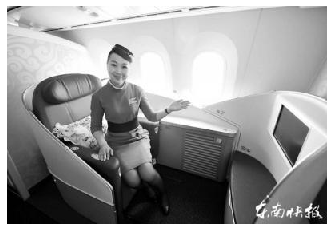

2.机舱 (score = 0.49517)
6.艺术室 (score = 0.12877)
7.流水线 (score = 0.08359)
0.航站楼 (score = 0.06256)
3.游乐场 (score = 0.06249)
1.停机坪 (score = 0.05247)
5.舞台 (score = 0.05162)
4.冰场 (score = 0.03084)
9.橄榄球场 (score = 0.01882)
8.棒球场 (score = 0.01366)

images/棒球场(1).jpg


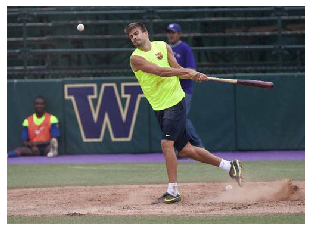

8.棒球场 (score = 0.60246)
9.橄榄球场 (score = 0.17411)
4.冰场 (score = 0.07681)
5.舞台 (score = 0.02994)
7.流水线 (score = 0.02474)
0.航站楼 (score = 0.02408)
3.游乐场 (score = 0.02241)
6.艺术室 (score = 0.01822)
1.停机坪 (score = 0.01664)
2.机舱 (score = 0.01060)

images/橄榄球场.jpg


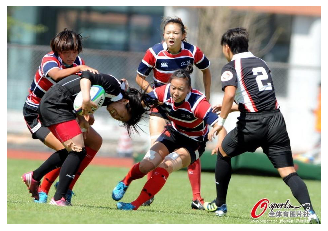

9.橄榄球场 (score = 0.90315)
8.棒球场 (score = 0.03359)
4.冰场 (score = 0.01221)
1.停机坪 (score = 0.00927)
3.游乐场 (score = 0.00877)
2.机舱 (score = 0.00718)
0.航站楼 (score = 0.00708)
7.流水线 (score = 0.00666)
6.艺术室 (score = 0.00659)
5.舞台 (score = 0.00550)

images/流水线(1).jpg


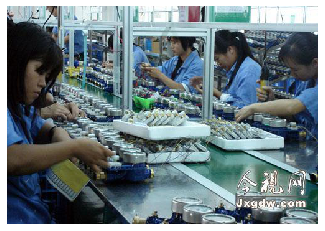

7.流水线 (score = 0.69653)
6.艺术室 (score = 0.16286)
0.航站楼 (score = 0.05059)
3.游乐场 (score = 0.02527)
5.舞台 (score = 0.01581)
2.机舱 (score = 0.01285)
1.停机坪 (score = 0.01103)
8.棒球场 (score = 0.01093)
4.冰场 (score = 0.01002)
9.橄榄球场 (score = 0.00412)

images/游乐场(1).jpg


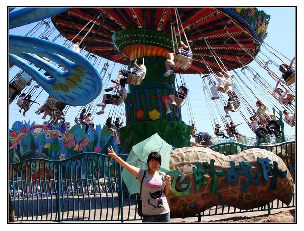

3.游乐场 (score = 0.74638)
4.冰场 (score = 0.04163)
6.艺术室 (score = 0.03293)
0.航站楼 (score = 0.03251)
5.舞台 (score = 0.03152)
7.流水线 (score = 0.03091)
1.停机坪 (score = 0.02591)
9.橄榄球场 (score = 0.02085)
8.棒球场 (score = 0.02067)
2.机舱 (score = 0.01668)

images/舞台.jpg


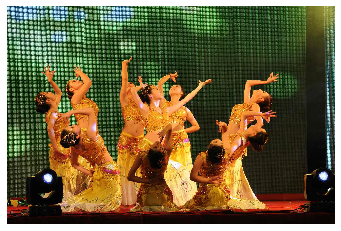

6.艺术室 (score = 0.19903)
5.舞台 (score = 0.19150)
3.游乐场 (score = 0.16527)
7.流水线 (score = 0.12142)
9.橄榄球场 (score = 0.07912)
0.航站楼 (score = 0.05971)
4.冰场 (score = 0.05520)
8.棒球场 (score = 0.05483)
2.机舱 (score = 0.04274)
1.停机坪 (score = 0.03117)

images/航站楼.jpg


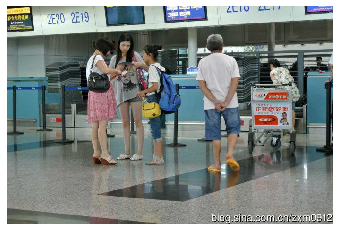

0.航站楼 (score = 0.83055)
7.流水线 (score = 0.05030)
4.冰场 (score = 0.03542)
5.舞台 (score = 0.03338)
2.机舱 (score = 0.01492)
6.艺术室 (score = 0.01045)
3.游乐场 (score = 0.01004)
8.棒球场 (score = 0.01000)
1.停机坪 (score = 0.00334)
9.橄榄球场 (score = 0.00160)

images/艺术室.jpg


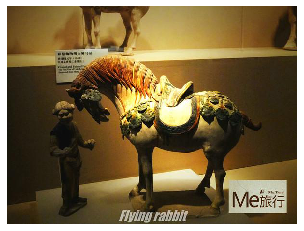

6.艺术室 (score = 0.38079)
3.游乐场 (score = 0.26553)
5.舞台 (score = 0.08598)
0.航站楼 (score = 0.05219)
7.流水线 (score = 0.04814)
4.冰场 (score = 0.04112)
1.停机坪 (score = 0.03861)
8.棒球场 (score = 0.03282)
9.橄榄球场 (score = 0.02975)
2.机舱 (score = 0.02507)



In [5]:
with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    
    # 测试images文件夹下的所有图片
    for root, dirs, files in os.walk('images/'):
        for file in files:
            # 读取图片
            image_data = tf.gfile.GFile(os.path.join(root, file), 'rb').read()
            
            pred = sess.run(softmax_tensor, {'DecodeJpeg/contents:0':image_data})   # 10维的
            pred = np.squeeze(pred)
            
            image_path = os.path.join(root, file)
            print(image_path)
            
            img = Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            
            # 排序提取前五个概率最大的
            top_k = pred.argsort()[::-1]    # 从大到小排序的索引
            for node_id in top_k:
                human_string = id_to_string(node_id)   # 把最大概率的五个索引传入id_to_string()获取对应的标签
                score = pred[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()

#### 附录

运行前配置好的文件：  
retrain.py:该文件是goole提供的，可将Inception网络的输出自定义为用户需要识别的类数目；  
data:训练的样本图片，一共是10个类放在10个对应文件夹下；  
images:是用于进行测试的10张图片  

操作：  
windows下运行retrain.bat文件，具体的类别数目存放在output_labels.txt文件中；（Linux下运行retrain.bat文件）  
（data下存放的是数据集有几个类就建立几个文件夹，文件夹以类别名称命名，对应文件夹下存放对应的类别图片；）；  
然后再通过ipynb文件对images里的图片做预测。  
